In [160]:
import pandas as pd
import pylab as pl

import statsmodels.api as sm

import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Importing and cleaning energy usage data (LL84) per building in NYC for 2015 (reported in 2016)

In [241]:
energy = pd.read_csv("nyc_benchmarking_disclosure_data_reported_in_2016.csv")
print(len(energy))
energy.head(1)

13223


,﻿Record Number,Order,"NYC Borough, Block and Lot (BBL)",Co-reported BBL Status,BBLs Co-reported,Reported NYC Building Identification Numbers (BINs),Property Name,Parent Property Id,Parent Property Name,Street Number,...,Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),DOF Property Floor Area (ft²),Property GFA - Self-reported (ft²),Water Use (All Water Sources) (kgal),Municipally Supplied Potable Water - Indoor Intensity (gal/ft²),Release Date,DEP Provided Water Use (kgal),Automatic Water Benchmarking Eligible,Reported Water Method
0,4113711.0,1,1.003360e+09,NaN,NaN,1088884,16 Bialystoker Place,Not Applicable: Standalone Property,Not Applicable: Standalone Property,15.0,...,290.2,146.1,98052.0,98000.0,NaN,NaN,4/13/16 11:08 AM,NaN,NaN,NaN


In [242]:
energy.rename(columns={'NYC Borough, Block and Lot (BBL)':"BBL", \
                       'Reported NYC Building Identification Numbers (BINs)':'BIN', \
                       'Direct GHG Emissions (Metric Tons CO2e)':'directCO2e', \
                       'Indirect GHG Emissions (Metric Tons CO2e)':'indirectCO2e', \
                      'Total GHG Emissions (Metric Tons CO2e)':'Emissions(CO2e)', \
                      'Water Use (All Water Sources) (kgal)':'water_use', \
                      'Weather Normalized Site Electricity (kWh)':'WNSE(kWh)', \
                      'Electricity Use - Grid Purchase (kBtu)':'grid_electricity(kBtu)'}, inplace=True)
energy.drop(['Municipally Supplied Potable Water - Indoor Intensity (gal/ft²)', 'Property GFA - Self-reported (ft²)', \
            'DEP Provided Water Use (kgal)', 'Automatic Water Benchmarking Eligible', 'Co-reported BBL Status', \
            'BBLs Co-reported', 'Weather Normalized Site Natural Gas Use (therms)', 'Reported Water Method', \
            'District Chilled Water Use (kBtu)', 'Natural Gas Use (kBtu)', 'District Steam Use (kBtu)', \
            'District Hot Water Use (kBtu)', 'Diesel #2 Use (kBtu)', 'DOF Benchmarking Submission Status',
       'Primary Property Type - Self Selected', 'water_use', 'Release Date',
       'List of All Property Use Types at Property',
       'Largest Property Use Type', 'Metered Areas (Energy)', 'Metered Areas  (Water)',
       'Largest Property Use Type - Gross Floor Area (ft²)',
       '2nd Largest Property Use Type', 'Order',
       '2nd Largest Property Use - Gross Floor Area (ft²)',
       '3rd Largest Property Use Type', '﻿Record Number',
       '3rd Largest Property Use Type - Gross Floor Area (ft²)','Fuel Oil #1 Use (kBtu)', 'Fuel Oil #2 Use (kBtu)', \
              'Weather Normalized Site Electricity Intensity (kWh/ft²)',
       'Weather Normalized Site Natural Gas Intensity (therms/ft²)',
       'Source EUI (kBtu/ft²)','Property Name',
       'Parent Property Id', 'Parent Property Name','Site EUI (kBtu/ft²)','Number of Buildings - Self-reported'], axis=1, inplace=True)
energy.head(1)

,BBL,BIN,Street Number,Street Name,Zip Code,Borough,Year Built,Occupancy,ENERGY STAR Score,Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Source EUI (kBtu/ft²),Fuel Oil #4 Use (kBtu),Fuel Oil #5 & 6 Use (kBtu),grid_electricity(kBtu),WNSE(kWh),Emissions(CO2e),directCO2e,indirectCO2e,DOF Property Floor Area (ft²)
0,1.003360e+09,1088884,15.0,BIALYSTOKER PLACE,10002.0,Manhattan,1982,100.0,87.0,74.4,115.7,Not Available,Not Available,1762214.1,516475.3,436.3,290.2,146.1,98052.0


In [243]:
energy.columns

Index(['BBL', 'BIN', 'Street Number', 'Street Name', 'Zip Code', 'Borough',
       'Year Built', 'Occupancy', 'ENERGY STAR Score',
       'Weather Normalized Site EUI (kBtu/ft²)',
       'Weather Normalized Source EUI (kBtu/ft²)', 'Fuel Oil #4 Use (kBtu)',
       'Fuel Oil #5 & 6 Use (kBtu)', 'grid_electricity(kBtu)', 'WNSE(kWh)',
       'Emissions(CO2e)', 'directCO2e', 'indirectCO2e',
       'DOF Property Floor Area (ft²)'],
      dtype='object')

In [244]:
energy = energy[energy["BIN"].str.contains(';')==False]
energy = energy[energy["BIN"].str.contains(',')==False]
energy = energy[energy["BIN"].str.contains(':')==False]
energy = energy[energy["BIN"].str.contains('-')==False]
len(energy)

10745

In [262]:
energy.sort(columns=['Emissions(CO2e)'], axis=0, ascending=False, inplace=True)
energy.head()

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,BBL,BIN,Street Number,Street Name,Zip Code,Borough,Year Built,Occupancy,ENERGY STAR Score,Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Source EUI (kBtu/ft²),Fuel Oil #4 Use (kBtu),Fuel Oil #5 & 6 Use (kBtu),grid_electricity(kBtu),WNSE(kWh),Emissions(CO2e),directCO2e,indirectCO2e,DOF Property Floor Area (ft²)
3293,1.013758e+09,1040808,660.0,MADISON AVENUE,10065.0,Manhattan,1958,100.0,1.0,NaN,NaN,Not Available,Not Available,45387018.1,13302172.5,15014684.7,134.7,15014550.0,475963.0
903,1.007390e+09,1013043,103.0,8 AVENUE,10011.0,Manhattan,1932,100.0,NaN,16887.0,20726.3,Not Available,Not Available,601793827.4,176375660.7,3221505.2,26.2,3221479.0,2161994.0
2936,1.012908e+09,1035762,2.0,EAST 55 STREET,10022.0,Manhattan,1904,100.0,1.0,88338.3,106404.3,Not Available,Not Available,29382633.0,8513529.7,2482353.9,256.9,2482097.0,323504.0
3391,1.013910e+09,Not Available,981.0,MADISON AVENUE,10075.0,Manhattan,1930,75.0,1.0,127429.9,153403.2,Not Available,Not Available,15466586.3,4532996.6,2470066.7,126.7,2469940.0,294142.0
1985,1.010110e+09,1023750,919.0,7 AVENUE,10019.0,Manhattan,1927,100.0,NaN,87342.8,105160.8,Not Available,Not Available,17828007.4,5155195.7,2320035.4,187.4,2319848.0,353996.0


In [ ]:
energy['BIN'] = energy['BIN'].astype(float)

In [ ]:
pl.figure(figsize=(8,4))
pl.scatter(energy['BIN'], energy['Weather Normalized Site EUI (kBtu/ft²)'], label=('Buildings'), marker=".")
pl.xlabel("Borough", fontsize=10)
pl.ylabel("Weather Normalized Site EUI (kBtu/ft²)", fontsize=10)
pl.title("Energy Use Per Building", fontsize=14)
pl.legend()

Importing and cleaning PLUTO data for Manhattan (other borough files were too large for Jupyter)

In [6]:
MHpluto = pd.read_csv('MN_reduced.csv').dropna()
print(len(MHpluto))
MHpluto.columns

17478


Index(['Borough', 'Block', 'Lot', 'CD', 'CT2010', 'CB2010', 'SchoolDist',
       'Council', 'ZipCode', 'FireComp', 'PolicePrct', 'HealthArea', 'Address',
       'ZoneDist1', 'BldgClass', 'LandUse', 'OwnerType', 'LotArea', 'BldgArea',
       'ComArea', 'ResArea', 'OfficeArea', 'RetailArea', 'GarageArea',
       'StrgeArea', 'FactryArea', 'OtherArea', 'AreaSource', 'NumBldgs',
       'NumFloors', 'UnitsRes', 'UnitsTotal', 'LotType', 'BsmtCode',
       'AssessLand', 'AssessTot', 'ExemptLand', 'ExemptTot', 'YearBuilt',
       'BoroCode', 'BBL', 'Tract2010', 'XCoord', 'YCoord', 'PLUTOMapID',
       'Version'],
      dtype='object')

In [7]:
MHpluto.drop(['Borough', 'Block', 'Lot', 'CD', 'Council', 'ComArea', 'ResArea', 'OfficeArea', 'RetailArea', \
              'GarageArea', 'StrgeArea', 'FactryArea', 'OtherArea', 'AreaSource', 'NumBldgs', 'ExemptLand', \
              'ExemptTot', 'YearBuilt', 'Version', 'ZoneDist1', 'UnitsRes', 'UnitsTotal', 'BsmtCode', \
              'AssessLand', 'BoroCode'], axis=1, inplace=True)
MHpluto.head(3)

,CT2010,CB2010,SchoolDist,ZipCode,FireComp,PolicePrct,HealthArea,Address,BldgClass,LandUse,...,LotArea,BldgArea,NumFloors,LotType,AssessTot,BBL,Tract2010,XCoord,YCoord,PLUTOMapID
0,5.0,1018.0,2.0,10004.0,E007,1.0,8100.0,1 GOVERNORS ISLAND,Y4,8.0,...,7736692,2725731,0.0,5.0,156510900,1000010010,5,979071.0,190225.0,1
1,1.0,1001.0,2.0,10004.0,E007,1.0,8200.0,1 LIBERTY ISLAND,P7,8.0,...,541886,541886,0.0,5.0,12197250,1000010101,1,971677.0,190636.0,1
5,9.0,1025.0,2.0,10004.0,L015,1.0,7700.0,MARGINAL STREET,Y7,7.0,...,209215,280000,5.0,5.0,32193900,1000020001,9,980670.0,194440.0,1


In [ ]:
energy.BBL = energy.BBL.astype(float)
MHpluto.BBL = MHpluto.BBL.astype(float)

In [9]:
type(MHpluto.BBL[1])

numpy.float64

In [10]:
type(energy.BBL[1])

numpy.float64

Merging building energy and PLUTO data for Manhattan (on Borough-Block-Lot).

In [252]:
merge1 = pd.merge(energy, MHpluto, on=['BBL'], how='inner')
print(len(merge1))
merge1.columns

1990


Index(['BBL', 'BIN', 'Street Number', 'Street Name', 'Zip Code', 'Borough',
       'Year Built', 'Occupancy', 'ENERGY STAR Score',
       'Weather Normalized Site EUI (kBtu/ft²)',
       'Weather Normalized Source EUI (kBtu/ft²)', 'Fuel Oil #4 Use (kBtu)',
       'Fuel Oil #5 & 6 Use (kBtu)', 'grid_electricity(kBtu)', 'WNSE(kWh)',
       'Emissions(CO2e)', 'directCO2e', 'indirectCO2e',
       'DOF Property Floor Area (ft²)', 'CT2010', 'CB2010', 'SchoolDist',
       'ZipCode', 'FireComp', 'PolicePrct', 'HealthArea', 'Address',
       'BldgClass', 'LandUse', 'OwnerType', 'LotArea', 'BldgArea', 'NumFloors',
       'LotType', 'AssessTot', 'Tract2010', 'XCoord', 'YCoord', 'PLUTOMapID'],
      dtype='object')

In [98]:
merge1.head()

,﻿Record Number,Order,BBL,BIN,Street Number,Street Name,Zip Code,Borough,Year Built,Occupancy,...,OwnerType,LotArea,BldgArea,NumFloors,LotType,AssessTot,Tract2010,XCoord,YCoord,PLUTOMapID
0,5048763.0,5,1.003920e+09,1079685,350.0,EAST 10 STREET,10009.0,Manhattan,2018,0.0,...,P,27681,93420,5.0,4.0,2665350,28,989933.0,203890.0,1
1,2897761.0,10,1.000090e+09,1000018,34.0,WHITEHALL STREET,10004.0,Manhattan,1969,100.0,...,P,29481,845018,32.0,3.0,138236850,9,980562.0,195311.0,1
2,2605878.0,11,1.000090e+09,1000020,17.0,STATE STREET,10004.0,Manhattan,1987,100.0,...,P,23080,544015,42.0,3.0,59250600,9,980402.0,195359.0,1
3,1426421.0,12,1.000090e+09,1000021,24.0,WHITEHALL STREET,10004.0,Manhattan,1969,100.0,...,P,39985,896956,35.0,1.0,67492800,9,980443.0,195525.0,1
4,4408948.0,13,1.000100e+09,1000025,90.0,BROAD STREET,10004.0,Manhattan,1931,70.0,...,P,15445,336025,24.0,3.0,27268650,9,980936.0,195692.0,1


In [249]:
merge1.to_csv(path_or_buf='merge1.csv')

In [250]:
# counting the buildings (in data set) per zip code
grouped = merge1.groupby('Zip Code')
zips = pd.DataFrame(grouped['Zip Code'].apply(np.size))
zips.rename(columns={'Zip Code':'Buildings/Zip'}, inplace=True)
zips.head(3)

,Buildings/Zip
Zip Code,
10001.0,78
10002.0,20
10003.0,83


In [253]:
energyPerZip = merge1.copy()
energyPerZip.drop(['BBL', 'BIN', 'Street Number', 'Street Name', \
                   'Borough', 'Year Built', 'Occupancy', 'Fuel Oil #5 & 6 Use (kBtu)', \
                'ENERGY STAR Score',
       'Weather Normalized Source EUI (kBtu/ft²)', 'Fuel Oil #4 Use (kBtu)', \
        'grid_electricity(kBtu)', 'WNSE(kWh)', 'directCO2e', 'indirectCO2e',
       'DOF Property Floor Area (ft²)', 'CT2010',
       'CB2010', 'SchoolDist', 'ZipCode', 'FireComp', 'PolicePrct',
       'HealthArea', 'Address', 'BldgClass', 'LandUse', 'OwnerType', 'LotArea',
       'BldgArea', 'NumFloors', 'LotType', 'AssessTot', 'Tract2010', 'XCoord', \
                   'YCoord', 'PLUTOMapID'], axis=1, inplace=True)

In [254]:
energyPerZip.head()

,Zip Code,Weather Normalized Site EUI (kBtu/ft²),Emissions(CO2e)
0,10013.0,226593.1,1269381.0
1,10021.0,133017.4,597568.6
2,10065.0,131121.4,2193812.2
3,10075.0,127429.9,2470066.7
4,10025.0,115367.9,1518089.3


In [82]:
type(energyPerZip['Emissions(CO2e)'][1])

numpy.float64

In [83]:
type(energyPerZip['Weather Normalized Site EUI (kBtu/ft²)'][1])

numpy.float64

In [255]:
energyPerZip.groupby(['Zip Code'])
print(len(energyPerZip))
energyPerZip.head()

1990


,Zip Code,Weather Normalized Site EUI (kBtu/ft²),Emissions(CO2e)
0,10013.0,226593.1,1269381.0
1,10021.0,133017.4,597568.6
2,10065.0,131121.4,2193812.2
3,10075.0,127429.9,2470066.7
4,10025.0,115367.9,1518089.3


Importing and cleaning asthma data for Manhattan zip codes from 2012-2014. Discharge rate is per 10,000 population.

In [114]:
MHasthma = pd.read_csv('MHasthma.csv')
print(len(MHasthma))
print(MHasthma.columns)
MHasthma.head(3)

43
Index(['﻿Zip Code', 'Discharges2012-2014', 'Discharge_Rate'], dtype='object')


,﻿Zip Code,Discharges2012-2014,Discharge_Rate
0,10001,159,21.9
1,10002,592,23.9
2,10003,130,7.7


In [115]:
MHasthma.rename(columns={'﻿Zip Code':'Zip Code'}, inplace=True)

In [116]:
type(MHasthma['Zip Code'][1])

numpy.int64

In [118]:
MHasthma['Zip Code'] = MHasthma['Zip Code'].astype(float)
MHasthma.head(2)

,Zip Code,Discharges2012-2014,Discharge_Rate
0,10001.0,159,21.9
1,10002.0,592,23.9


## 2.1 What is the relationship between building energy use and public health, measured by the local asthma hospitalization rate?

Merging just the building energy data with asthma data. Grouping building energy by zip code first. Leaving out PLUTO and Census for now.

Using Weather Normalized Site EUI, because the environmental impacts of a building's electricity source don't affect the buildling's local public health.

In [256]:
energy_Zip = energy.groupby(['Zip Code'])[['Weather Normalized Site EUI (kBtu/ft²)', \
                                           'Emissions(CO2e)']].sum()

In [257]:
energy_Zip['Zip Code'] = energy_Zip.index
x = len(energy_Zip)
energy_Zip.index = np.arange(0,x)
energy_Zip.head()

,Weather Normalized Site EUI (kBtu/ft²),Emissions(CO2e),Zip Code
0,12612.0,285257.8,10001.0
1,2998.4,33170.0,10002.0
2,112037.2,2604604.4,10003.0
3,22145.1,549393.4,10004.0
4,78828.7,1356384.2,10005.0


In [267]:
MHasthmaZip = pd.merge(energy_Zip, MHasthma, on=['Zip Code'], how='inner')
MHasthmaZip['Discharges2012-2014'] = MHasthmaZip['Discharges2012-2014'].str.replace(',', '')
MHasthmaZip['Discharges2012-2014'] = MHasthmaZip['Discharges2012-2014'].astype(float)
MHasthmaZip['Zip Code'] = MHasthmaZip['Zip Code'].astype(int)
MHasthmaZip.to_csv(path_or_buf='MH_asthma_energy_per_zip.csv')
print(len(MHasthmaZip))
MHasthmaZip.head()

42


,Weather Normalized Site EUI (kBtu/ft²),Emissions(CO2e),Zip Code,Discharges2012-2014,Discharge_Rate
0,12612.0,285257.8,10001,159.0,21.9
1,2998.4,33170.0,10002,592.0,23.9
2,112037.2,2604604.4,10003,130.0,7.7
3,22145.1,549393.4,10004,NaN,NaN
4,78828.7,1356384.2,10005,6.0,2.2


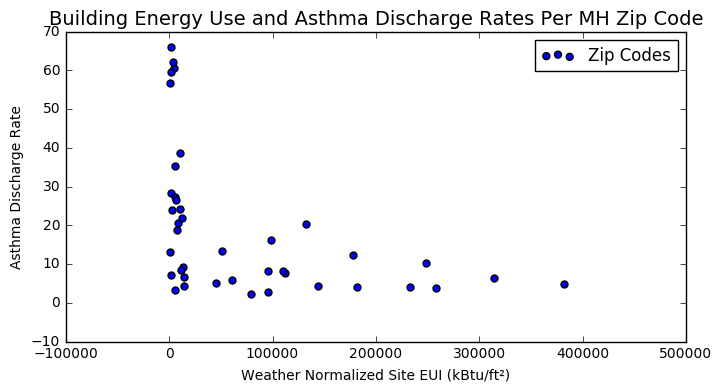

In [259]:
#model1 = sm.OLS(MHasthmaZip['Discharge_Rate'], sm.add_constant(MHasthmaZip['Weather Normalized Site EUI (kBtu/ft²)'])).fit()
#fig, ax = plt.subplots(figsize=(10,4))
#fig = sm.graphics.plot_fit(model1, MHasthmaZip['Discharge_Rate'], ax=ax)

pl.figure(figsize=(8,4))
pl.scatter(MHasthmaZip['Weather Normalized Site EUI (kBtu/ft²)'], MHasthmaZip['Discharge_Rate'], s=100, \
           cmap='bone', label=('Zip Codes'), marker=".")
pl.xlabel("Weather Normalized Site EUI (kBtu/ft²)", fontsize=10)
pl.ylabel("Asthma Discharge Rate", fontsize=10)
pl.title("Building Energy Use and Asthma Discharge Rates Per MH Zip Code", fontsize=14)
pl.legend()

In [177]:
#model = sm.OLS(MHasthmaZip['Discharge_Rate'], MHasthmaZip['Weather Normalized Site EUI (kBtu/ft²)'])
#results = model.fit()
#print(results.summary())

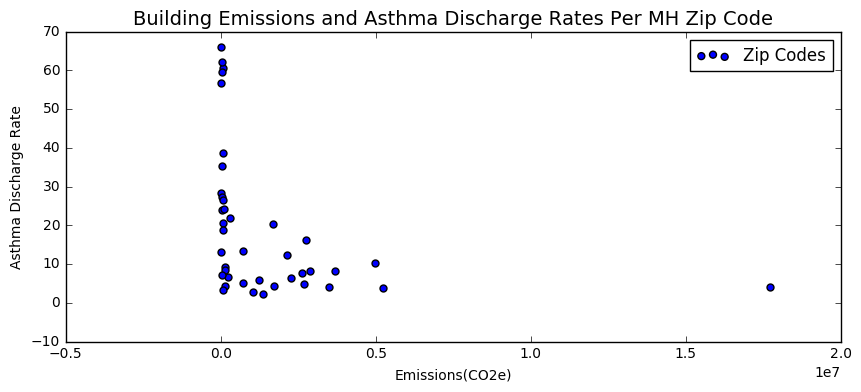

In [260]:
pl.figure(figsize=(10,4))
pl.scatter(MHasthmaZip['Emissions(CO2e)'], MHasthmaZip['Discharge_Rate'], s=100, \
           cmap='bone', label=('Zip Codes'), marker=".")
pl.xlabel("Emissions(CO2e)", fontsize=10)
pl.ylabel("Asthma Discharge Rate", fontsize=10)
pl.title("Building Emissions and Asthma Discharge Rates Per MH Zip Code", fontsize=14)
pl.legend()

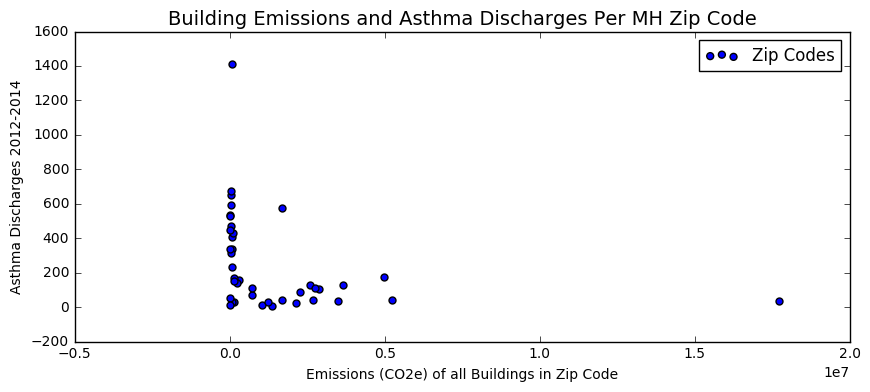

In [261]:
pl.figure(figsize=(10,4))
pl.scatter(MHasthmaZip['Emissions(CO2e)'], MHasthmaZip['Discharges2012-2014'], s=100, \
           cmap='bone', label=('Zip Codes'), marker=".")
pl.xlabel("Emissions (CO2e) of all Buildings in Zip Code", fontsize=10)
pl.ylabel("Asthma Discharges 2012-2014", fontsize=10)
pl.title("Building Emissions and Asthma Discharges Per MH Zip Code", fontsize=14)
pl.legend()

In [268]:
MHasthmaZip.sort(columns=['Emissions(CO2e)'], axis=0, ascending=False, inplace=True)
MHasthmaZip.head()

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,Weather Normalized Site EUI (kBtu/ft²),Emissions(CO2e),Zip Code,Discharges2012-2014,Discharge_Rate
38,181356.5,17728635.8,10065,37.0,4.1
18,258669.2,5224097.6,10022,40.0,3.9
13,248638.0,4987043.0,10016,173.0,10.2
9,95796.0,3665438.7,10011,127.0,8.1
39,232589.9,3493533.3,10075,36.0,4.1


In [ ]:
#offices = data[data['Primary Property Type - Self Selected'] == 'Office'].dropna().values
#len(offices)

In [ ]:
#x = offices['Weather Normalized Source EUI (kBtu/ft²)']
#len(offices['Weather Normalized Source EUI (kBtu/ft²)'])

In [ ]:
#n, bins, patches = plt.hist(x, 50, normed=1, facecolor='green', alpha=0.75)

#plt.xlabel('Smarts')
#plt.ylabel('Probability')
#plt.title(r'$\mathrm{Histogram\ of\ IQ:}\ \mu=100,\ \sigma=15$')
#plt.axis([40, 160, 0, 0.03])
#plt.grid(True)

#plt.show()

## 1.0 How can we develop a metric for understanding energy performance and peer building comparison that accounts for the differences in building and occupancy characteristics that impact consumption?

## 2.2 What is the relationship between neighborhood income and residential building energy use?